plot for FACS sorted cells 

In [18]:
library(tidyverse)
library(reshape2)
library(ggplot2)
library(gplots)
library(UpSetR)
library(reshape)
library(ggpubr)
library(pheatmap)
library(RColorBrewer)
library(viridis)

ERROR: Error in library(UpSetR): there is no package called ‘UpSetR’


In [2]:
clusteredf = read.csv(file = 'wt_BCfreq.csv', header=TRUE, row.names="cloneID")

In [3]:
clusteredfmin =clusteredf[,c(-1,-2,-3,-4)]  
dt <- as.matrix(clusteredfmin)

In [4]:
nrow(dt)

[1] 65

In [5]:
#move the selected clone barcodes to the top
select = c('6','1','12','23','5','4','28','15','34')
dt = dt[c(select, setdiff(row.names(dt), select)),]

In [6]:
#dt = dt[,c(1,2,3,6,5,4,7,8,9,10)]
dt = dt[,c(1,2,3,5,4,7,8,9,10)] #remove the unsorted sample

In [52]:
dt

,sample.1.freq,sample.2.freq,sample.3.freq,sample.5.freq,sample.4.freq,sample.7.freq,sample.8.freq,sample.9.freq,sample.10.freq
6,8.503130e-01,1.176545e-02,1.483072e-03,0.0055414108,1.979028e-02,0.0000000000,0.000000e+00,0.000000e+00,0.0039697308
1,9.799756e-03,7.317445e-01,1.299639e-02,0.0322000899,4.026613e-02,0.0092686215,6.600118e-02,4.484403e-03,0.0011785138
12,0.000000e+00,0.000000e+00,8.559859e-01,0.0010483750,0.000000e+00,0.0000000000,2.165606e-01,2.337148e-04,0.0000000000
23,0.000000e+00,1.536654e-01,0.000000e+00,0.7582746743,2.878111e-02,0.0000000000,0.000000e+00,0.000000e+00,0.0000000000
5,2.956921e-02,5.446087e-03,1.057664e-02,0.0227647147,6.486915e-01,0.0028648466,5.023500e-02,0.000000e+00,0.0068643262
4,0.000000e+00,4.874486e-03,8.098351e-03,0.0055414108,8.213847e-03,0.9398382204,1.659939e-01,0.000000e+00,0.0000000000
28,0.000000e+00,0.000000e+00,0.000000e+00,0.0000000000,0.000000e+00,0.0000000000,1.889273e-01,9.348593e-04,0.0000000000
15,0.000000e+00,0.000000e+00,0.000000e+00,0.0002995357,0.000000e+00,0.0000000000,0.000000e+00,9.939161e-01,0.0000000000
34,0.000000e+00,4.255252e-03,0.000000e+00,0.0026958215,6.529290e-06,0.0053926525,0.000000e+00,0.000000e+00,0.9703303974
22,5.466338e-03,0.000000e+00,0.000000e+00,0.0016474465,0.000000e+00,0.0000000000,0.000000e+00,0.000000e+00,0.0000000000


Warning message in heatmap.2(dt, trace = "none", density.info = "none", col = viridis(20), :
“Discrepancy: Rowv is FALSE, while dendrogram is `both'. Omitting row dendogram.”
Warning message in heatmap.2(dt, trace = "none", density.info = "none", col = viridis(20), :
“Discrepancy: Colv is FALSE, while dendrogram is `column'. Omitting column dendogram.”


pdf 
  2

Warning message in heatmap.2(dt, trace = "none", density.info = "none", col = viridis(20), :
“Discrepancy: Rowv is FALSE, while dendrogram is `both'. Omitting row dendogram.”
Warning message in heatmap.2(dt, trace = "none", density.info = "none", col = viridis(20), :
“Discrepancy: Colv is FALSE, while dendrogram is `column'. Omitting column dendogram.”


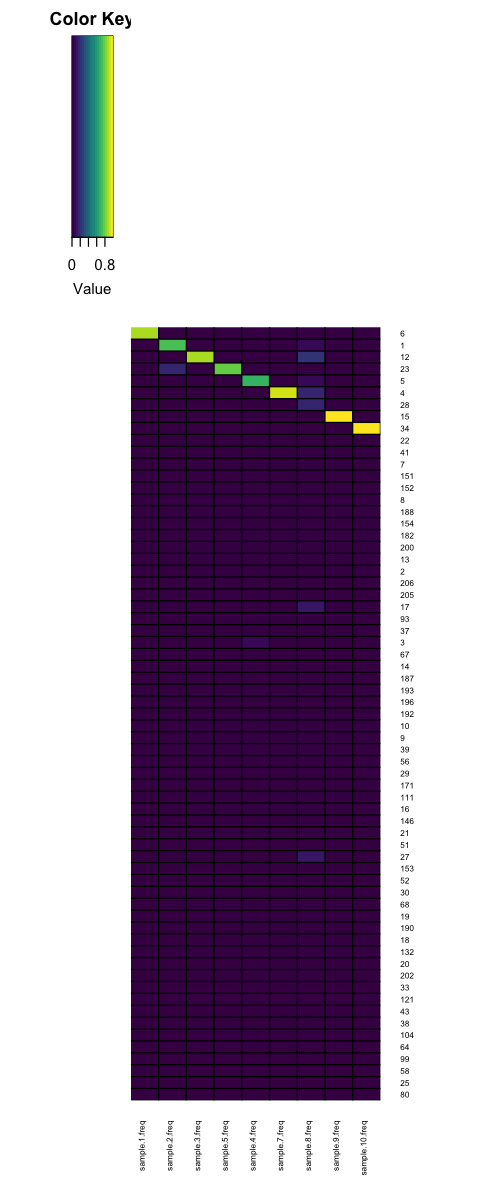

In [20]:
w = 4
h = 10

options(repr.plot.width=w, repr.plot.height=h)

pdf("clonecluster.pdf",         # File name
    width = w, height = h)

 heatmap.2(dt, trace = "none", density.info = 'none', col =viridis(20), cexRow=0.5, cexCol = 0.5, 
           colsep =1:ncol(dt),
           sepwidth=c(0.00001,0.00001),
           sepcolor="black",
           rowsep=1:nrow(dt),Rowv=FALSE, Colv=FALSE)

dev.off()


 heatmap.2(dt, trace = "none", density.info = 'none', col =viridis(20), cexRow=0.5, cexCol = 0.5, 
           colsep =1:ncol(dt),
           sepwidth=c(0.00001,0.00001),
           sepcolor="black",
           rowsep=1:nrow(dt),Rowv=FALSE, Colv=FALSE)



#heatmap.2(dt, trace = "none", density.info = 'none', col =viridis(20), cexRow=0.5, cexCol = 0.5,   
#dendrogram='none',     
#Rowv=FALSE,
#Colv=FALSE)




In [79]:
melted <- melt(data = dt, id.vars = 1)
names(melted)[names(melted) == 'Var1'] <- 'X1'
names(melted)[names(melted) == 'Var2'] <- 'X2'
melted$order = as.integer(rownames(melted))

head(melted)

,X1,X2,value,order
,<int>,<fct>,<dbl>,<int>
1,6,sample.1.freq,0.850312969,1
2,1,sample.1.freq,0.009799756,2
3,12,sample.1.freq,0.000000000,3
4,23,sample.1.freq,0.000000000,4
5,5,sample.1.freq,0.029569207,5
6,4,sample.1.freq,0.000000000,6


In [83]:
melted = melted %>% 
  mutate(match = case_when
         ((X1 == 6 & X2 == "sample.1.freq" ~ "Yes"),
         (X1 == 1 & X2 == "sample.2.freq" ~ "Yes"),
         (X1 == 12 & X2 == "sample.3.freq" ~ "Yes"),
         (X1 == 23 & X2 == "sample.5.freq" ~ "Yes"),
         (X1 == 5 & X2 == "sample.4.freq" ~ "Yes"),
         (X1 == 4 & X2 == "sample.7.freq" ~ "Yes"),
         (X1 == 28 & X2 == "sample.8.freq" ~ "Yes"),
         (X1 == 15 & X2 == "sample.9.freq" ~ "Yes"),
         (X1 == 34 & X2 == "sample.10.freq" ~ "Yes")
        ))

head(melted)

,X1,X2,value,order,match
,<int>,<fct>,<dbl>,<int>,<chr>
1,6,sample.1.freq,0.850312969,1,Yes
2,1,sample.1.freq,0.009799756,2,NA
3,12,sample.1.freq,0.000000000,3,NA
4,23,sample.1.freq,0.000000000,4,NA
5,5,sample.1.freq,0.029569207,5,NA
6,4,sample.1.freq,0.000000000,6,NA


In [65]:
library(ggforestplot)

ERROR: Error in library(ggforestplot): there is no package called ‘ggforestplot’


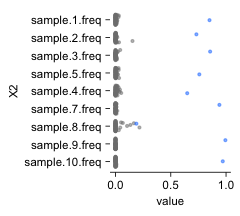

In [66]:
# define const for visualization

w <- 2
h <- 1.8

options(repr.plot.width=w, repr.plot.height=h)

FONT.SIZE <- 7
LABEL.FONT.SIZE <- 7
LINE.W <- 0.2320667 # equivalent to 0.75pt in Keynote

          
settheme <- theme_bw() + theme(
    panel.background = element_blank(),
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(),
    plot.background = element_blank(),
     panel.border = element_blank(),
    axis.ticks = element_line(colour = "black", size = LINE.W),
    axis.line = element_line(size = LINE.W, colour = "black"),
    axis.line.y = element_blank(),
    axis.title = element_text(size = FONT.SIZE),
    axis.text = element_text(colour = "black", size = FONT.SIZE),
    legend.position="none")

p = ggplot(melted, aes(value, X2, color = match))+ 
  geom_jitter(alpha = 0.5, size = 0.5, width = 0, height = 0.3)+ settheme+ 
   scale_color_manual(values= c("Yes" = "#157AFF"))+
    scale_y_discrete(limits = rev)+
    scale_x_continuous(breaks=seq(0,1, by=0.5) )


p 

ggsave(file = "frequencycloneisolated.pdf",p , width = w, height = h)



# change fomat to match soh's

In [27]:
library(ggplot2)
library(scales)
library(dplyr)

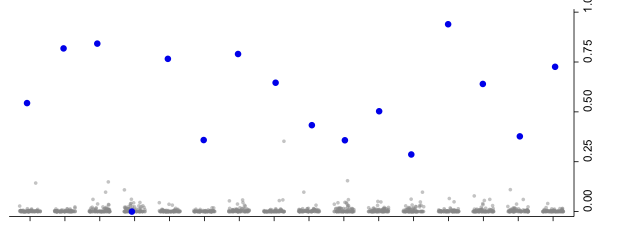

In [89]:
FONT.SIZE <- 7
LINE.W <- 0.232 # 0.5pt


df <- read.csv("./plotbysoh/norm_barcode_rep1_R_friendly.csv", header = TRUE, sep = ",")

g.heatmap <- ggplot(df, aes(x = reorder(bc_new, order), y = reorder(query_bc_new, -order))) +
    geom_tile(aes(fill = norm_bc), colour = NA) +
    theme_classic() +
    theme(
        panel.background = element_blank(),
        plot.background = element_blank(),
        axis.ticks.x = element_blank(),
        axis.ticks.y = element_line(colour = "black", size = LINE.W),
        axis.text.x = element_blank(),
        axis.text.y = element_text(colour = "black", size = FONT.SIZE),
        axis.line = element_blank(),
        panel.border = element_blank()
    ) +
    scale_fill_gradientn(
        colours = c("gray97", "blue", "blue2", "darkblue"),
        limits = c(0, 100), na.value = "white"
    ) +
    labs(x = "", y = "") +
    guides(fill = "none")

ggsave(plot = g.heatmap, filename = "BC_heatmap_07192022.pdf", w = 5.2, h = 2.1)

g.jitter <- ggplot(df, aes(x = reorder(query_bc, order), y = norm_bc / 100)) +
    geom_jitter(data = df %>% filter(is_match == "NT"), aes(colour = is_match), width = 0.3, size = 0.7, alpha = 0.5, shape = 16) +
    geom_jitter(data = df %>% filter(is_match == "OT"), aes(colour = is_match), width = 0.1, size = 1.5, shape = 16) +
    scale_y_continuous(limits = c(-0.01, 1), expand = c(0.015, 0), position = "right") +
    scale_colour_manual(values = c("OT" = "blue2", "NT" = "gray60")) +
    theme_classic() +
    theme(
        panel.background = element_blank(),
        plot.background = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_text(colour = "black", size = FONT.SIZE, angle = 90),
        axis.line = element_line(colour = "black", size = LINE.W),
        axis.ticks = element_line(colour = "black", size = LINE.W)
    ) +
    labs(x = "", y = "") +
    guides(colour = "none")
ggsave(plot = g.jitter, filename = "BC_jitter_07192022.pdf", w = 2.20, h = 1.2)

g.jitter

In [31]:
head(df)

,order,query_bc,query_bc_new,norm_bc,bc,bc_new,is_match
,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,1,112-V10-BC14,BC-C655,54.416500333,112-V10-BC14,BC-C655,OT
2,2,112-V10-BC14,BC-C655,0.008393285,112-V10-BC15,BC-C115,NT
3,3,112-V10-BC14,BC-C655,0.059504132,112-V10-BC17,BC-C26,NT
4,4,112-V10-BC14,BC-C655,0.001554002,112-V10-BC25,BC-C760,NT
5,5,112-V10-BC14,BC-C655,0.816883923,112-V10-BC29,BC-C282,NT
6,6,112-V10-BC14,BC-C655,1.310895212,112-V10-BC31,BC-C251,NT


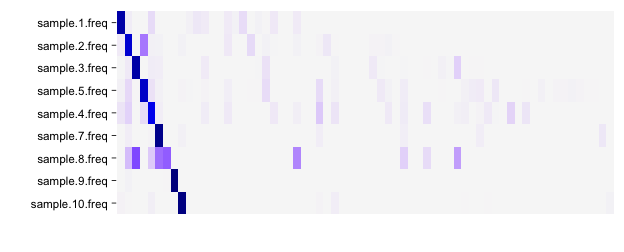

In [149]:
FONT.SIZE <- 7
LINE.W <- 0.232 # 0.5pt


w = 5.2
h = 2.1

options(repr.plot.width=w, repr.plot.height=h)


g.heatmap <- ggplot(melted, aes(x = reorder(X1,order), y = reorder(X2,-order))) +
    geom_tile(aes(fill = value), colour = NA) +
    theme_classic() +
    theme(
        panel.background = element_blank(),
        plot.background = element_blank(),
        axis.ticks.x = element_blank(),
        axis.ticks.y = element_line(colour = "black", size = LINE.W),
        axis.text.x = element_blank(),
        axis.text.y = element_text(colour = "black", size = FONT.SIZE),
        axis.line = element_blank(),
        panel.border = element_blank()
    ) +
    scale_fill_gradientn(
        colours = c("gray97", "blue", "blue2", "darkblue"),
        limits = c(0, 1), na.value = "white"
    ) +
    labs(x = "", y = "")+
    guides(fill = "none")

ggsave(plot = g.heatmap, filename = "BC_heatmap_scCloneSelect.pdf", w = 5.2, h = 1.95)

g.heatmap



In [112]:
melted[is.na(melted)] <- "No"
head(melted)

,X1,X2,value,order,match
,<int>,<fct>,<dbl>,<int>,<chr>
1,6,sample.1.freq,0.850312969,1,Yes
2,1,sample.1.freq,0.009799756,2,No
3,12,sample.1.freq,0.000000000,3,No
4,23,sample.1.freq,0.000000000,4,No
5,5,sample.1.freq,0.029569207,5,No
6,4,sample.1.freq,0.000000000,6,No


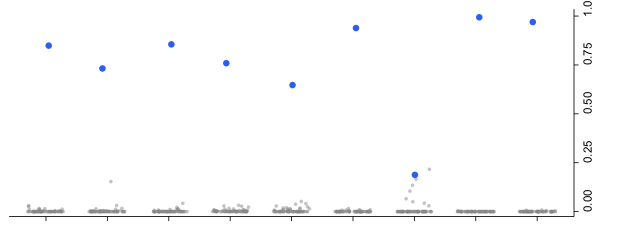

In [130]:
g.jitter <- ggplot(melted, aes(x = reorder(X2, order), y = value)) +
    geom_jitter(data = melted %>% filter(match == "No"), aes(colour = match), width = 0.3, size = 0.7, alpha = 0.5, shape = 16) +
    geom_jitter(data = melted %>% filter(match == "Yes"), aes(colour = match), width = 0.1, size = 1.5, shape = 16) +
    scale_y_continuous(limits = c(-0.01, 1.02), expand = c(0.015, 0), position = "right") +
    scale_colour_manual(values = c("Yes" = "#3978F6", "No" = "gray60")) +
    theme_classic() +
    theme(
        panel.background = element_blank(),
        plot.background = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_text(colour = "black", size = FONT.SIZE, angle = 90),
        axis.line = element_line(colour = "black", size = LINE.W),
        axis.ticks = element_line(colour = "black", size = LINE.W)
    ) +
    labs(x = "", y = "") +
    guides(colour = "none")
    
ggsave(plot = g.jitter, filename = "BC_jitter_scCloneSelect.pdf", w = 2, h = 1.2)

g.jitter